In [1]:
#importing all pachage will be needed during assignment
import numpy as np
# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
from tkinter import filedialog
from tkinter import *
import pandas as pd

In [2]:
root = Tk()
root.filename =  filedialog.askopenfilename(initialdir = "/",title = "Select file")

In [3]:
def get_training_data(file_path):
    columns_name=['input','output']
    data=pd.read_table(file_path,sep=',',names=columns_name)
    Y_data=data['output'].values.reshape(-1,1)
    X_data=data['input'].values.reshape(-1,1)
    return X_data,Y_data

In [4]:
#test
X,Y = get_training_data(root.filename)
assert X.shape == (97,1)
assert Y.shape == (97,1)
print("expected output "+str(X[0][0]))
print("                "+str(Y[0][0]))

expected output 6.1101
                17.592


expected output 6.1101
                17.592

In [32]:
def plot_data(X_data,Y_data,parameters=None,plot_line=False):
    pyplot.ylabel('Output')
    pyplot.xlabel('Input')
    pyplot.plot(X_data, Y_data, 'ro', ms=10, mec='k')
    if plot_line==True:
        w=parameters["w"]
        b=parameters["b"]
        pyplot.plot(X_data,w*X_data+b, '-')
        pass

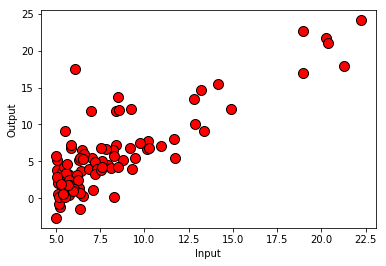

In [6]:
plot_data(X,Y)

In [7]:
def initial_parameters():
    w=np.zeros((1,1))
    b=np.zeros((1,1))
    parameters = {"w":w,
                  "b":b}
    return parameters

In [8]:
#test
par=initial_parameters()
assert par["w"].shape == (1,1)
print(par["w"])

[[0.]]


expected_output **[[0.]]**

In [44]:
def compute_cost(X,Y,parameters):
    w=parameters["w"]
    b=parameters["b"]
    Y_hat=w*X+b
    m=X.shape[0]
    cost=float(np.sum((Y_hat-Y)**2,axis=0,keepdims=True)/(2*m))
    return cost

In [45]:
#test
cost=compute_cost(X,Y,{"w":2,"b":3})
print(cost)

100.1643148758268


**100.16431488**

In [46]:
def update_parameters(X,Y,parameters,learning_rate):
    w=parameters["w"]
    b=parameters["b"]
    Y_hat=w*X+b
    m=X.shape[0]
    dw=np.sum((Y_hat-Y)*X,axis=0,keepdims=True)/(m)
    db=np.sum((Y_hat-Y),axis=0,keepdims=True)/(m)
    w=w-learning_rate*dw
    b=b-learning_rate*db
    parameters = {"w":w,
                  "b":b}
    return parameters

In [47]:
#test
par=update_parameters(X,Y,{"w":2,"b":3},.01)
print(par.values())

dict_values([array([[0.78041564]]), array([[2.86519535]])])


**dict_values([array([[0.78041564]]), array([[2.86519535]])])**

In [66]:
#cost history is a list contain cost every 100 iteration
def linear_regression_one_variable(data_file,learning_rate=.01,iteration=1500,print_cost=False):
    X,Y=get_training_data(data_file)
    parameters=initial_parameters()
    cost_history=[]
    for i in range(0,iteration+1):
        parameters=update_parameters(X,Y,parameters,learning_rate)
        if print_cost and i % 100 == 0:
            cost=compute_cost(X,Y,parameters)
            cost_history.append(cost)
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters,cost_history

In [67]:
#test
parameters,cost_history=linear_regression_one_variable(root.filename,learning_rate=.01,iteration=2000,print_cost=True)

Cost after iteration 0: 6.737190
Cost after iteration 100: 5.476363
Cost after iteration 200: 5.173635
Cost after iteration 300: 4.962606
Cost after iteration 400: 4.815501
Cost after iteration 500: 4.712956
Cost after iteration 600: 4.641474
Cost after iteration 700: 4.591644
Cost after iteration 800: 4.556908
Cost after iteration 900: 4.532694
Cost after iteration 1000: 4.515815
Cost after iteration 1100: 4.504049
Cost after iteration 1200: 4.495847
Cost after iteration 1300: 4.490129
Cost after iteration 1400: 4.486143
Cost after iteration 1500: 4.483365
Cost after iteration 1600: 4.481428
Cost after iteration 1700: 4.480078
Cost after iteration 1800: 4.479137
Cost after iteration 1900: 4.478481
Cost after iteration 2000: 4.478024


- Cost after iteration 0: 6.737190
- Cost after iteration 100: 5.476363
- Cost after iteration 200: 5.173635
- Cost after iteration 300: 4.962606
- Cost after iteration 400: 4.815501

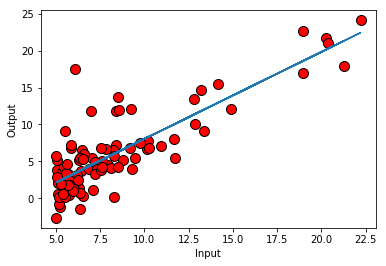

In [68]:
plot_data(X,Y,parameters=parameters,plot_line=True)

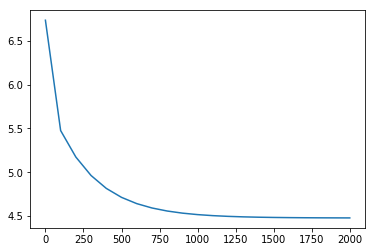

In [71]:
pyplot.plot([x for x in range(0,2001,100)],cost_history, '-')

In [52]:
def predict (x,parameters):
    
    
    
    
    return y